Instalamos y cargamos las librerias que se van a utilizar

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime as dt
import pandas as pd

%pip install windrose
from windrose import WindroseAxes

%pip uninstall shapely
%pip install shapely --no-binary shapely # HAY QUE RESPONDER Y (YES)
%pip install --upgrade cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker


Found existing installation: shapely 2.0.1
Uninstalling shapely-2.0.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/shapely-2.0.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/shapely.libs/libgeos-ee7a1634.so.3.11.1
    /usr/local/lib/python3.10/dist-packages/shapely.libs/libgeos_c-5ef8a841.so.1.17.1
    /usr/local/lib/python3.10/dist-packages/shapely/*
Proceed (Y/n)? Y
  Successfully uninstalled shapely-2.0.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.5/275.5 kB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shapely: filename=shapely-2.0.1-cp310-cp310-linux_x86_64.whl size=890025 sha256=6f02716d98243b3fe25d66c043e065a3d31c7cf25336ab04e3a1a3db16fa06fb
  Stored in directory: /root/.cache/pip/wheels/07/bd/06/4e979fa263bca266484ee65f5aab8e6b1c9b20f8caa6f2d7da
Successfully built shapely
   

Cargamos los datos de viento de QuickSCAT

In [4]:
# Cargo la componente zonal del viento
quick_u = xr.open_dataset('/content/QuickScat_u_monthly_2000_2009.nc',decode_times=False)

# Vemos la metadata
quick_u

lon = quick_u.LONN279_N200.data
lat = quick_u.LAT161_224.data
time = quick_u.TIME.data # datetime64: 2000-01-01, 2009-12-01
u10 = quick_u.U.data  # dimension: (time,latitude,longitude)

# Cargo la componente zonal del viento
quick_v = xr.open_dataset('/content/QuickScat_v_monthly_2000_2009.nc',decode_times=False)

# Vemos la metadata
quick_v

v10 = quick_v.V.data


Calculamos la climatología de manera más artesanal

In [ ]:
# 1ero paso de dias julianos de matlab a datetime python
times = np.zeros((len(time),),dtype='object')
for i in range(len(time)):
    #day = dt.datetime.fromordinal(int(time[i,]))
    #dayfrac = dt.timedelta(days=time[i,]%1) - dt.timedelta(days = 366)
    #times[i,] = day+dayfrac
    times[i,] = dt.datetime.fromordinal(int(time[i,]-1))

# time1 = pd.to_datetime(times)

# climatologia
b = np.shape(u10)

# componente zonal
mu = np.empty((12,b[1],b[2]))
mu[:] = np.nan
for i in range(12):
    x = list(range(i,len(times),12))
    mu[i,:,:] = np.nanmean(u10[x,:,:],axis=0)

# componente meridional
mv = np.empty((12,b[1],b[2]))
mv[:] = np.nan
for i in range(12):
    x = list(range(i,len(times),12))
    mv[i,:,:] = np.nanmean(v10[x,:,:],axis=0)


Ahora que tenemos la climatología, hacemos los mapas de enero y julio

In [ ]:
# Grafico mapa de enero
fig = plt.figure(figsize=(8, 5), facecolor='white')
ax = plt.axes(projection=ccrs.PlateCarree())
lon_min = -70; lon_max = -50
lat_min = -50; lat_max = -34
ax.set_extent([lon_min, lon_max, lat_min, lat_max]) # min lon, max lon, min lat, max lat
ax.add_feature(cfeature.LAND, color='silver')
ax.add_feature(cfeature.LAKES, color='lightcyan')
ax.add_feature(cfeature.RIVERS, edgecolor='black')
ax.coastlines(resolution='50m', color='black', linewidth=1)

# Add state boundaries to plot
quiver_kwargs = {'headlength': 3, 'headwidth': 2, 'angles': 'uv', 'scale_units': 'xy',
                  'scale': 5}

# Plot the wind vectors
ax.quiver(lon,lat,mu[0,:,:], mv[0,:,:],color='blue', **quiver_kwargs)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.8, linestyle='dotted')
#gl.top_labels = False; gl.right_labels = False
gl.ylabels_right = False; gl.xlabels_top = False
gl.xlocator = mticker.FixedLocator([-70,-67,-64,-61,-58,-55,-52])
gl.ylocator = mticker.FixedLocator([-50,-47.5,-45,-42.5,-40,-37.5,-35,-32.5])
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}

# Add a title to the plot
plt.title('Enero',color='black', size=14)
plt.show()


# Grafico mapa de julio
fig = plt.figure(figsize=(8, 5), facecolor='white')
ax = plt.axes(projection=ccrs.PlateCarree())
lon_min = -70; lon_max = -50
lat_min = -50; lat_max = -34
ax.set_extent([lon_min, lon_max, lat_min, lat_max]) # min lon, max lon, min lat, max lat
ax.add_feature(cfeature.LAND, color='silver')
ax.add_feature(cfeature.LAKES, color='lightcyan')
ax.add_feature(cfeature.RIVERS, edgecolor='black')
ax.coastlines(resolution='50m', color='black', linewidth=1)

# Add state boundaries to plot
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=2)
quiver_kwargs = {'headlength': 3, 'headwidth': 2, 'angles': 'uv', 'scale_units': 'xy',
                  'scale': 5}

# Plot the wind vectors
ax.quiver(lon,lat,mu[6,:,:], mv[6,:,:],color='blue', **quiver_kwargs)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.8, linestyle='dotted')
#gl.top_labels = False; gl.right_labels = False
gl.ylabels_right = False; gl.xlabels_top = False
gl.xlocator = mticker.FixedLocator([-70,-67,-64,-61,-58,-55,-52])
gl.ylocator = mticker.FixedLocator([-50,-47.5,-45,-42.5,-40,-37.5,-35,-32.5])
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}

# Add a title to the plot
plt.title('Julio',color='black', size=14)
plt.show()


Elegimos dos cajas para extraer la serie de tiempo de velocidad zonal y meridional, y luego graficamos la rosa de los vientos

<ipython-input-7-3b434c774157>:4: RuntimeWarning: Mean of empty slice
  caja_u1 = np.nanmean(np.nanmean(u10b,axis=2),axis=1)
<ipython-input-7-3b434c774157>:7: RuntimeWarning: Mean of empty slice
  caja_v1 = np.nanmean(np.nanmean(v10b,axis=2),axis=1)
<ipython-input-7-3b434c774157>:33: RuntimeWarning: Mean of empty slice
  caja_u2 = np.nanmean(np.nanmean(u10b,axis=2),axis=1)
<ipython-input-7-3b434c774157>:36: RuntimeWarning: Mean of empty slice
  caja_v2 = np.nanmean(np.nanmean(v10b,axis=2),axis=1)


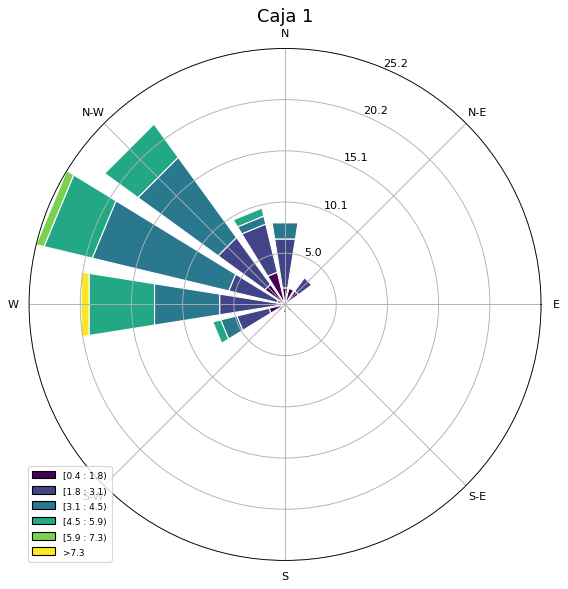

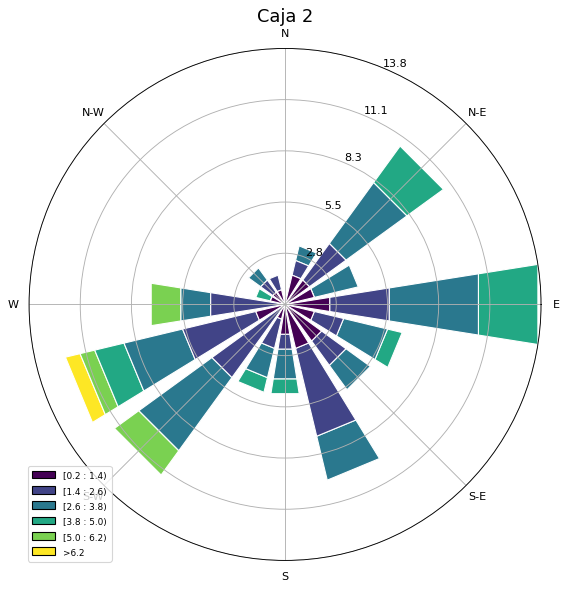

In [7]:
# limites de la caja 1 (a leccion): lon 58W-55W, 42S-40S

u10b = quick_u['U'].sel(LAT161_224 = slice(-42,-40), LONN279_N200 = slice(-58,-55))
caja_u1 = np.nanmean(np.nanmean(u10b,axis=2),axis=1)

v10b = quick_v['V'].sel(LAT161_224 = slice(-42,-40), LONN279_N200 = slice(-58,-55))
caja_v1 = np.nanmean(np.nanmean(v10b,axis=2),axis=1)

# calculo el angulo en grados
dir_caja1 = np.empty((len(times),))
for i in range(len(caja_u1)):
    dir_caja1[i] = math.atan2(caja_v1[i],caja_u1[i])*(180/np.pi)

# re acomodo el angulo para que indique de donde viene en viento y en
# convencion meteorologica
dir_caja1b = np.remainder(-90-dir_caja1,360)

# calculo la intensidad
ws = np.sqrt(caja_u1*caja_u1 + caja_v1*caja_v1)

theta_labels = ["E", "N-E", "N", "N-W", "W", "S-W", "S", "S-E"]

# hacer rosa de los vientos. OJO! los datos no deben tener nan
ax = WindroseAxes.from_ax(theta_labels=theta_labels)
ax.bar(dir_caja1b[~np.isnan(dir_caja1b)], ws[~np.isnan(ws)], normed=True, edgecolor='white')
ax.set_legend()
plt.title('Caja 1', fontsize=16)

del u10b, v10b, ws

# limites de la caja 2 (a leccion): lon 58W-55W, 42S-40S
u10b = quick_u['U'].sel(LAT161_224 = slice(-37,-35), LONN279_N200 = slice(-55,-53))
caja_u2 = np.nanmean(np.nanmean(u10b,axis=2),axis=1)

v10b = quick_v['V'].sel(LAT161_224 = slice(-37,-35), LONN279_N200 = slice(-55,-53))
caja_v2 = np.nanmean(np.nanmean(v10b,axis=2),axis=1)

# calculo el angulo en grados
dir_caja2 = np.empty((len(times),))
for i in range(len(caja_u2)):
    dir_caja2[i] = math.atan2(caja_v2[i],caja_u2[i])*(180/np.pi)

# re acomodo el angulo para que indique de donde viene en viento y en
# convencion meteorologica
dir_caja2b = np.remainder(-90-dir_caja2,360)

# calculo la intensidad
ws = np.sqrt(caja_u2*caja_u2 + caja_v2*caja_v2)

theta_labels = ["E", "N-E", "N", "N-W", "W", "S-W", "S", "S-E"]

# hacer rosa de los vientos. OJO! los datos no deben tener nan
ax = WindroseAxes.from_ax(theta_labels=theta_labels)
ax.bar(dir_caja2b[~np.isnan(dir_caja2b)], ws[~np.isnan(ws)], normed=True, edgecolor='white')
ax.set_legend()
plt.title('Caja 2', fontsize=16)

del u10b, v10b, ws
